In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [30]:
df1= pd.read_csv('../data/data1.csv')
df2= pd.read_csv('../data/data2.csv')
df3= pd.read_csv('../data/data3.csv')
df4= pd.read_csv('../data/data4.csv')
df5= pd.read_csv('../data/data5.csv')
df6= pd.read_csv('../data/data6.csv')
df8= pd.read_csv('../data/data8.csv')

In [7]:
display(df1.describe().T)
df1.head()

,count,mean,std,min,25%,50%,75%,max
value,188.0,0.471006,0.217891,-0.318728,0.319081,0.332098,0.708332,1.339762


,date,value
0,2024-01-01,0.321490
1,2024-01-02,0.322059
2,2024-01-03,NaN
3,2024-01-04,0.331385
4,2024-01-05,0.327712


In [8]:
display(df2.describe().T)
df2.head()

,count,mean,std,min,25%,50%,75%,max
value,188.0,0.672863,0.2285,-0.1969,0.516008,0.77749,0.817156,1.451575


,date,value
0,2024-01-01,0.862862
1,2024-01-02,0.863686
2,2024-01-03,0.867064
3,2024-01-04,0.866030
4,2024-01-05,0.845779


In [9]:
display(df3.describe().T)
df3.head()

,count,mean,std,min,25%,50%,75%,max
value,188.0,0.586638,0.161562,0.140112,0.408387,0.630897,0.698219,1.236263


,date,value
0,2024-01-01,0.318111
1,2024-01-02,0.339262
2,2024-01-03,NaN
3,2024-01-04,0.354690
4,2024-01-05,0.345999


In [10]:
display(df4.describe().T)
df4.head()

,count,mean,std,min,25%,50%,75%,max
value,188.0,0.588595,0.207615,-0.132897,0.414029,0.601949,0.725972,1.362844


,date,value
0,2024-01-01,0.311355
1,2024-01-02,0.288668
2,2024-01-03,0.318044
3,2024-01-04,0.327835
4,2024-01-05,0.316202


In [11]:
display(df5.describe().T)
df5.head()

,count,mean,std,min,25%,50%,75%,max
value,188.0,0.638129,0.147484,0.072734,0.504286,0.66601,0.751192,0.954892


,date,value
0,2024-01-01,0.757531
1,2024-01-02,0.718990
2,2024-01-03,0.760947
3,2024-01-04,0.751997
4,2024-01-05,0.760936


In [12]:
display(df6.describe().T)
df6.head()

,count,mean,std,min,25%,50%,75%,max
value,188.0,0.38578,0.079006,0.101479,0.343325,0.357895,0.463272,0.705529


,date,value
0,2024-01-01,0.349284
1,2024-01-02,0.356819
2,2024-01-03,0.369898
3,2024-01-04,0.365482
4,2024-01-05,0.370966


In [31]:
display(df8.describe().T)
df8.head()

,count,mean,std,min,25%,50%,75%,max
Value,200.0,0.570414,0.207876,0.107604,0.39282,0.491105,0.750852,0.980531


,Date,Value
0,2024-01-01,0.672173
1,2024-01-02,0.842921
2,2024-01-03,0.894061
3,2024-01-04,0.806412
4,2024-01-05,0.712018


In [32]:
def plot_time_series(df, x, y):
    ax = df.plot.line(x=x, y=y, figsize=(16,6))
    plt.xlabel(x)
    plt.ylabel(y)

    ax.set_xticks(range(0, len(df[x]), 10))
    ax.set_xticklabels(df[x].astype(str).iloc[::10], rotation=45)

    plt.show()

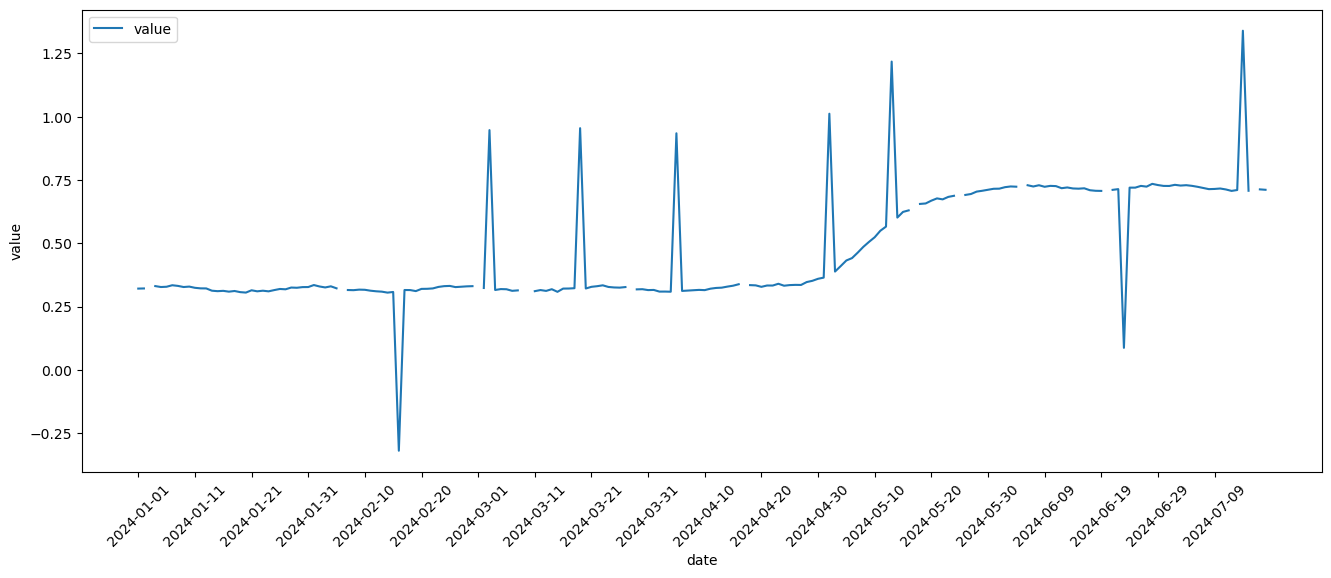

In [33]:
plot_time_series(df1,'date','value')

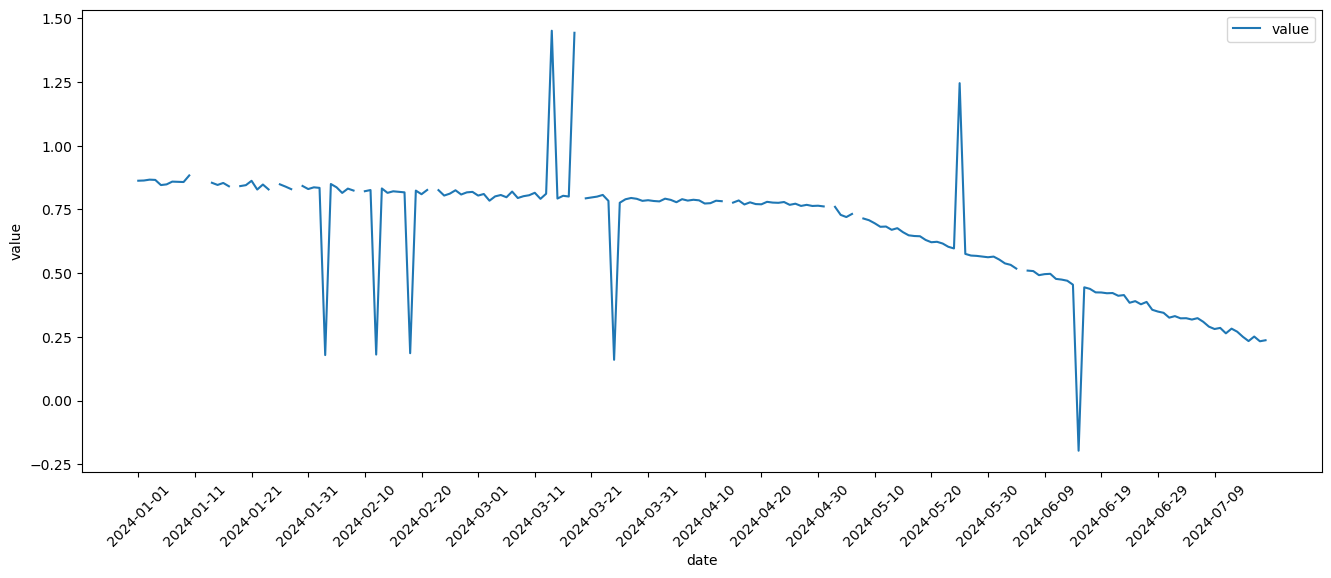

In [34]:
plot_time_series(df2,'date','value')

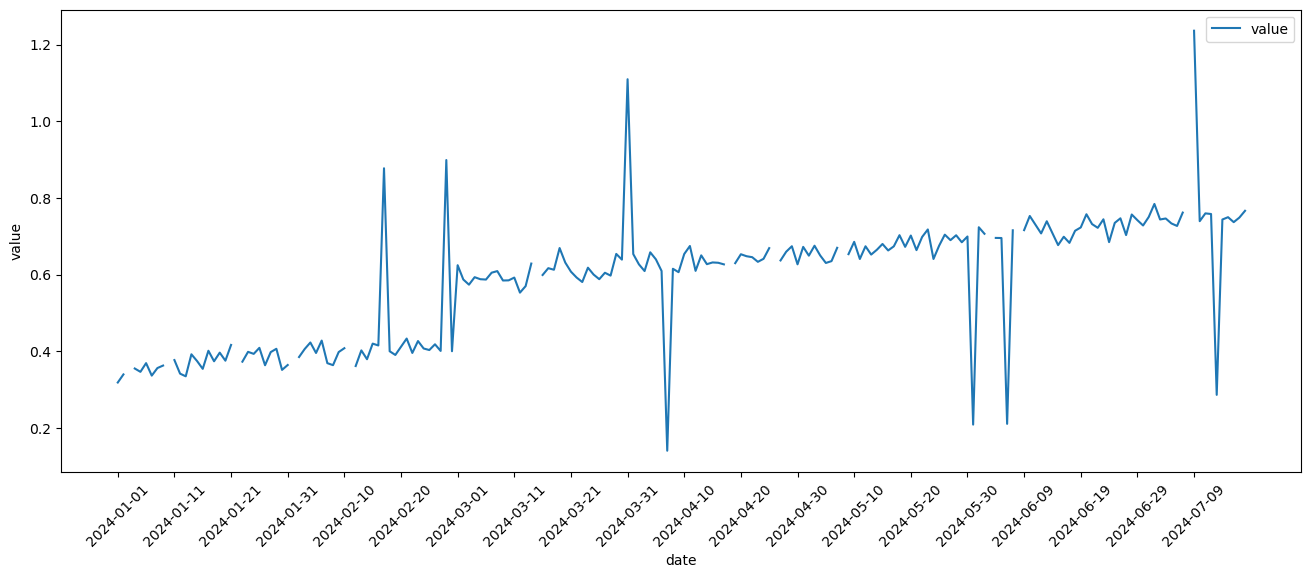

In [35]:
plot_time_series(df3,'date','value')

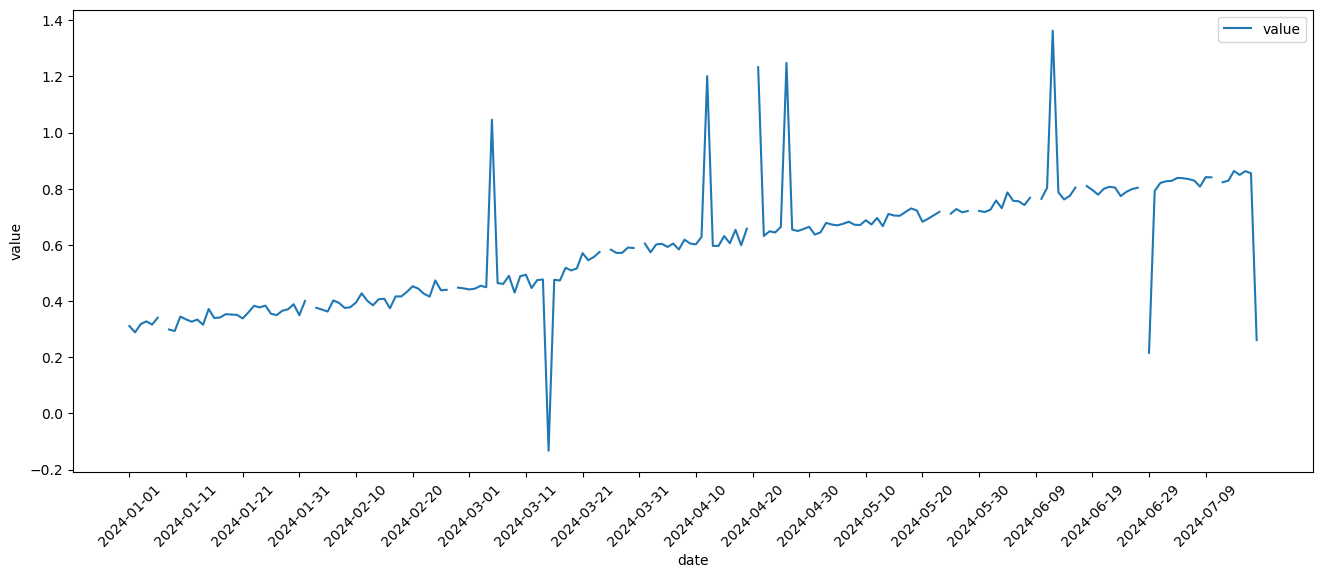

In [36]:
plot_time_series(df4,'date','value')

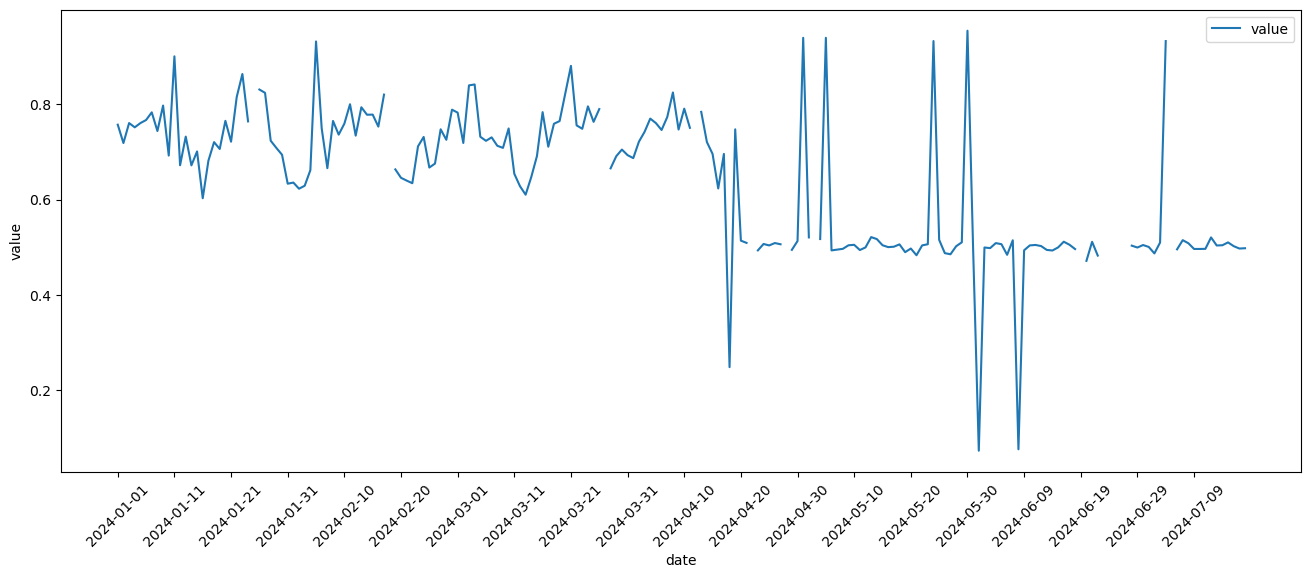

In [37]:
plot_time_series(df5,'date','value')

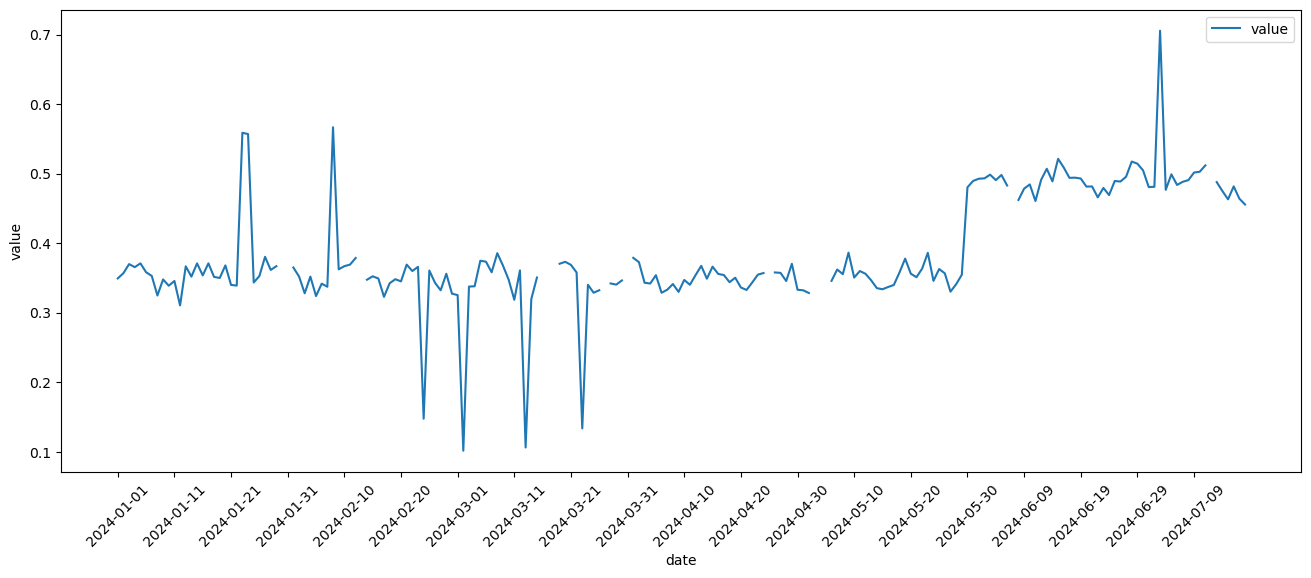

In [38]:
plot_time_series(df6,'date','value')

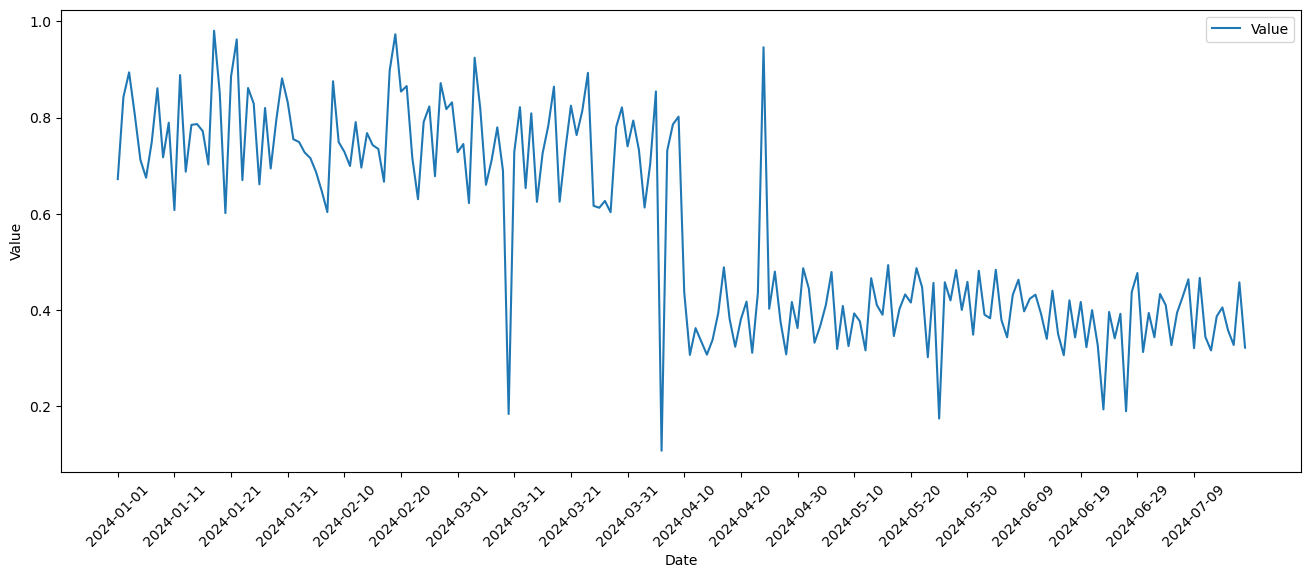

In [43]:
plot_time_series(df8,'Date','Value')

,count,mean,std,min,25%,50%,75%,max
ram_usage_GB,80.0,8.117216,0.405210,7.013573,8.21021,8.23839,8.257956,8.670658
ram_utilization_percent,80.0,51.015000,2.547280,44.100000,51.60000,51.80000,51.900000,54.500000
cpu_utilization_percent,80.0,64.196250,20.614567,7.800000,61.17500,67.50000,79.200000,92.100000


,time,ram_usage_GB,ram_utilization_percent,cpu_utilization_percent
0,2025-08-17_21-45-25,7.876648,49.5,43.7
1,2025-08-17_21-45-26,7.578224,47.6,80.3
2,2025-08-17_21-45-27,7.842964,49.3,71.3
3,2025-08-17_21-45-28,7.843349,49.3,75.8
4,2025-08-17_21-45-29,7.816677,49.1,67.7


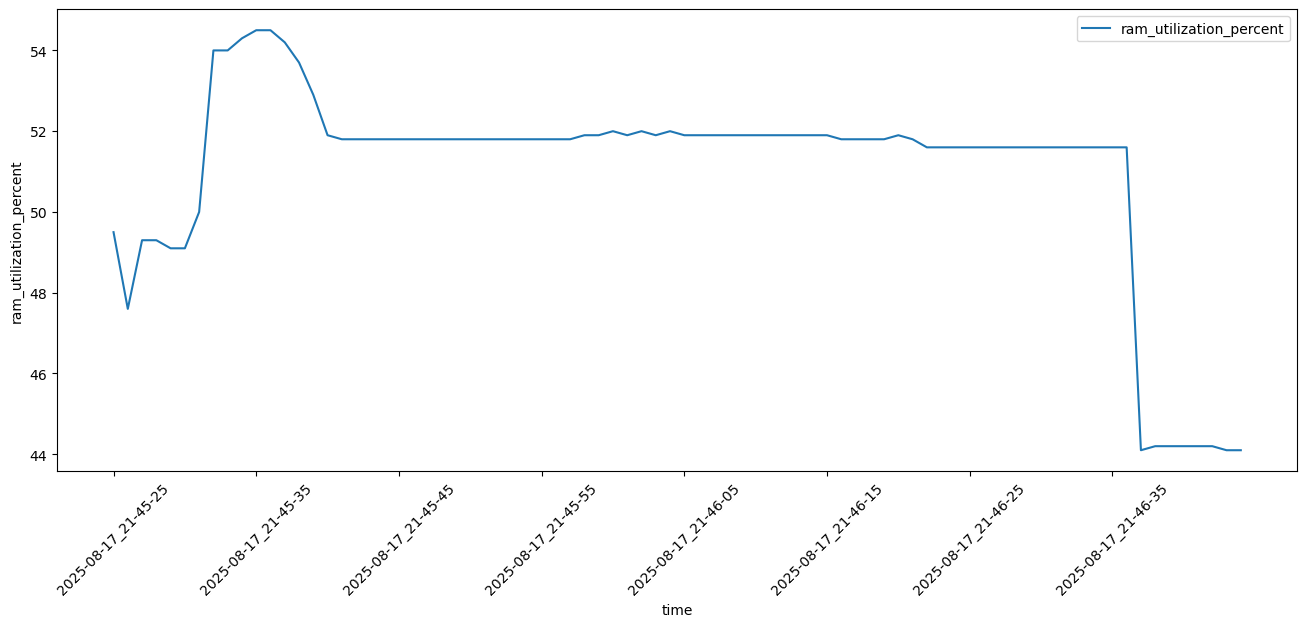

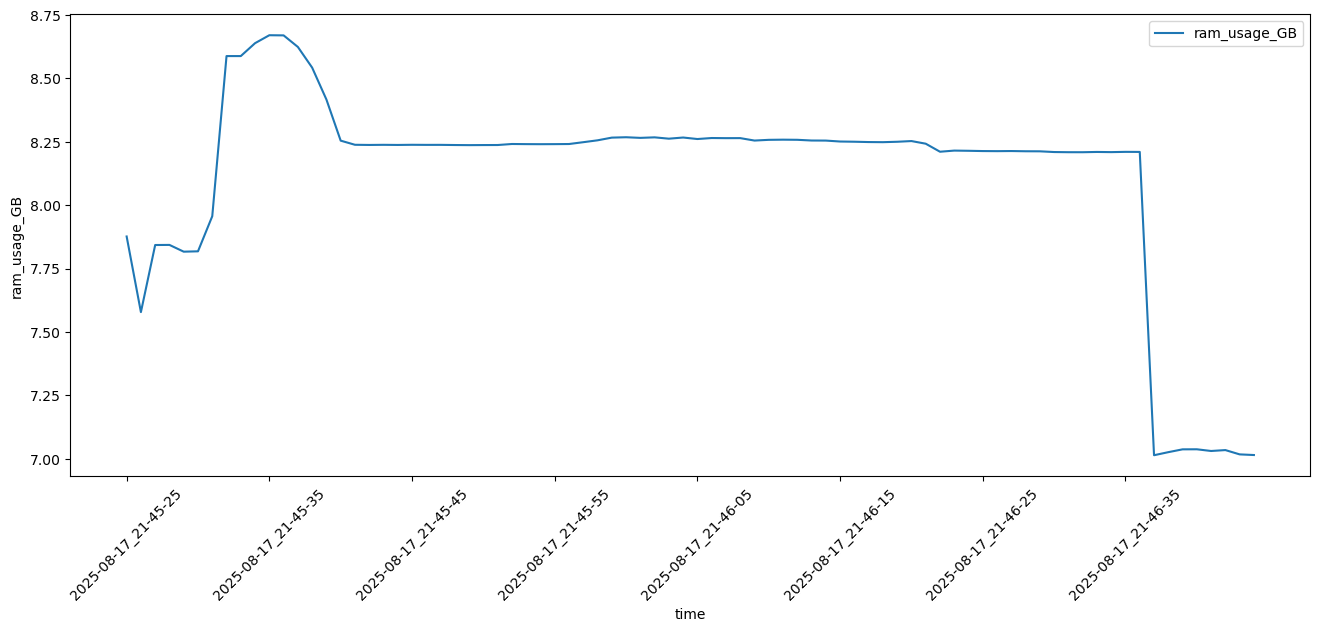

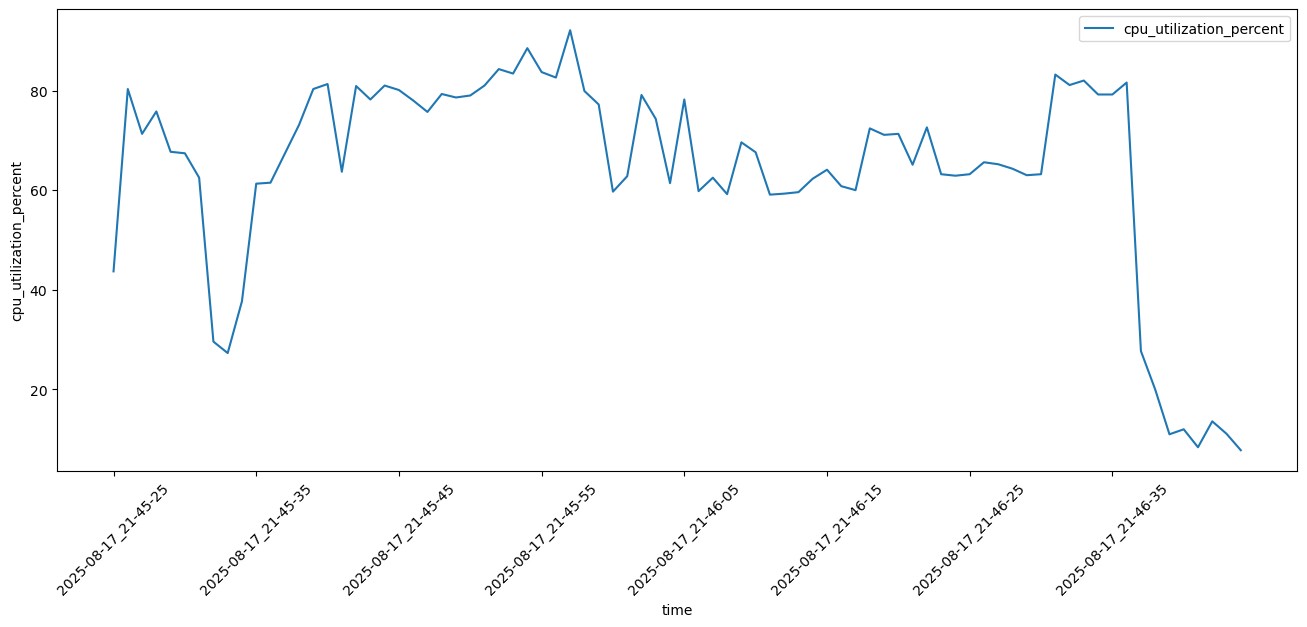

In [39]:
df_4_threads = pd.read_csv('../data/4threads.csv')
display(df_4_threads.describe().T)
display(df_4_threads.head())

plot_time_series(df_4_threads,'time','ram_utilization_percent')
plot_time_series(df_4_threads,'time','ram_usage_GB')
plot_time_series(df_4_threads,'time','cpu_utilization_percent')

,count,mean,std,min,25%,50%,75%,max
ram_usage_GB,100.0,6.935135,0.828887,5.956783,6.401483,6.434065,7.59651,8.768787
ram_utilization_percent,100.0,43.569000,5.207603,37.400000,40.200000,40.400000,47.70000,55.100000
cpu_utilization_percent,100.0,88.013000,21.761154,10.300000,93.225000,95.850000,97.92500,99.600000


,time,ram_usage_GB,ram_utilization_percent,cpu_utilization_percent
0,2025-08-17_21-49-03,7.485516,47.0,28.8
1,2025-08-17_21-49-04,7.357121,46.2,88.2
2,2025-08-17_21-49-05,7.411015,46.6,89.5
3,2025-08-17_21-49-07,7.402153,46.5,79.5
4,2025-08-17_21-49-08,7.379654,46.4,83.5


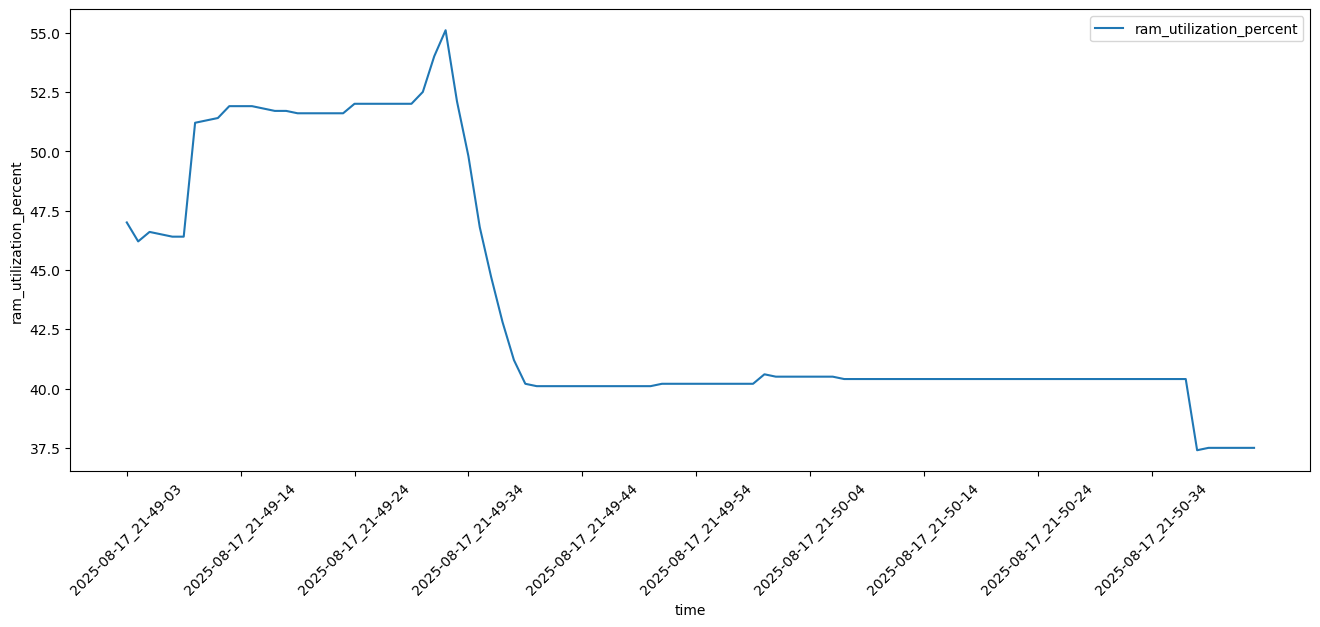

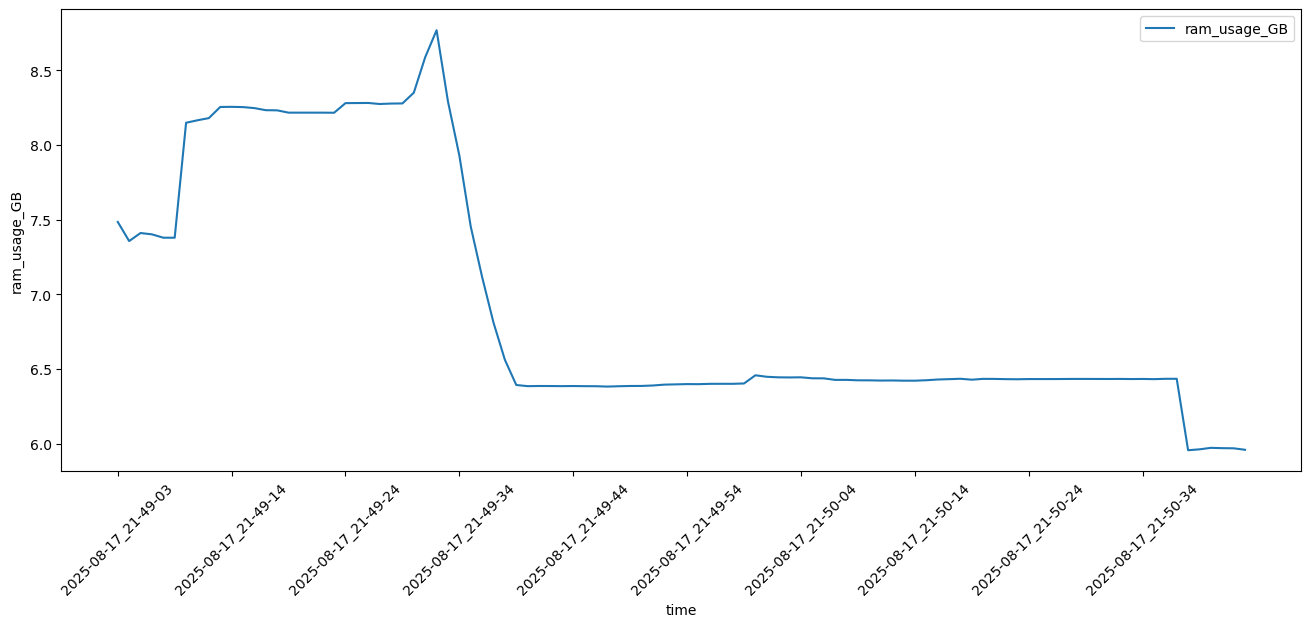

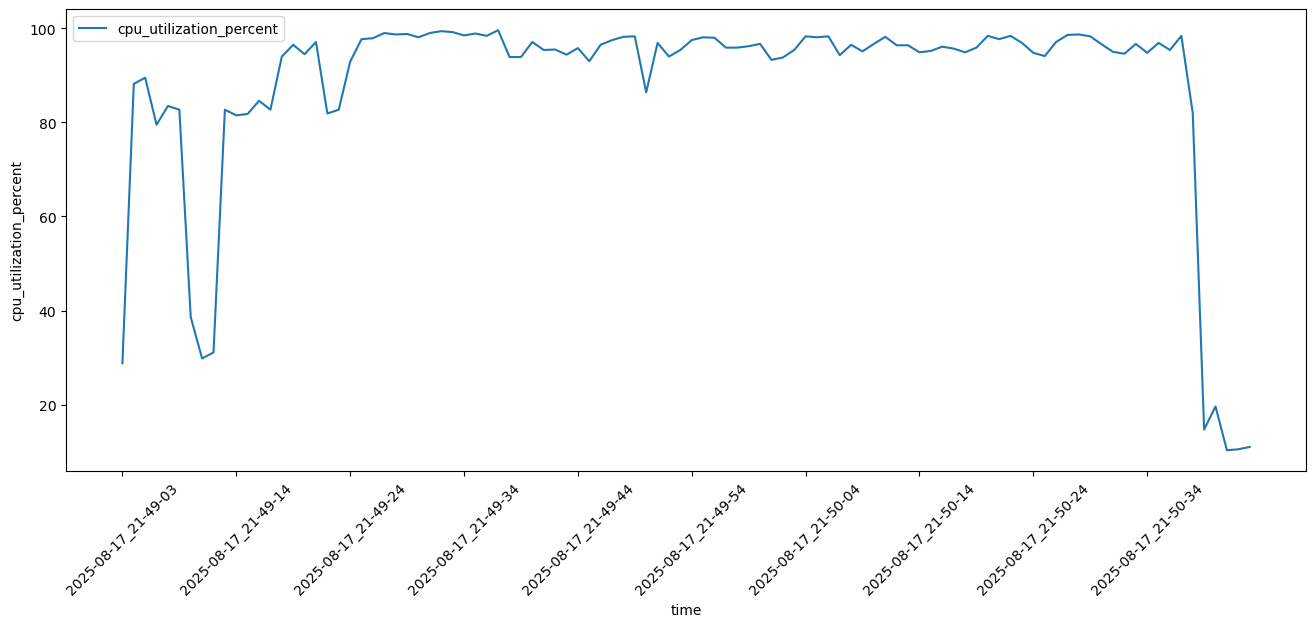

In [40]:
df_6_threads = pd.read_csv('../data/6threads.csv')
display(df_6_threads.describe().T)
display(df_6_threads.head())
plot_time_series(df_6_threads,'time','ram_utilization_percent')
plot_time_series(df_6_threads,'time','ram_usage_GB')
plot_time_series(df_6_threads,'time','cpu_utilization_percent')

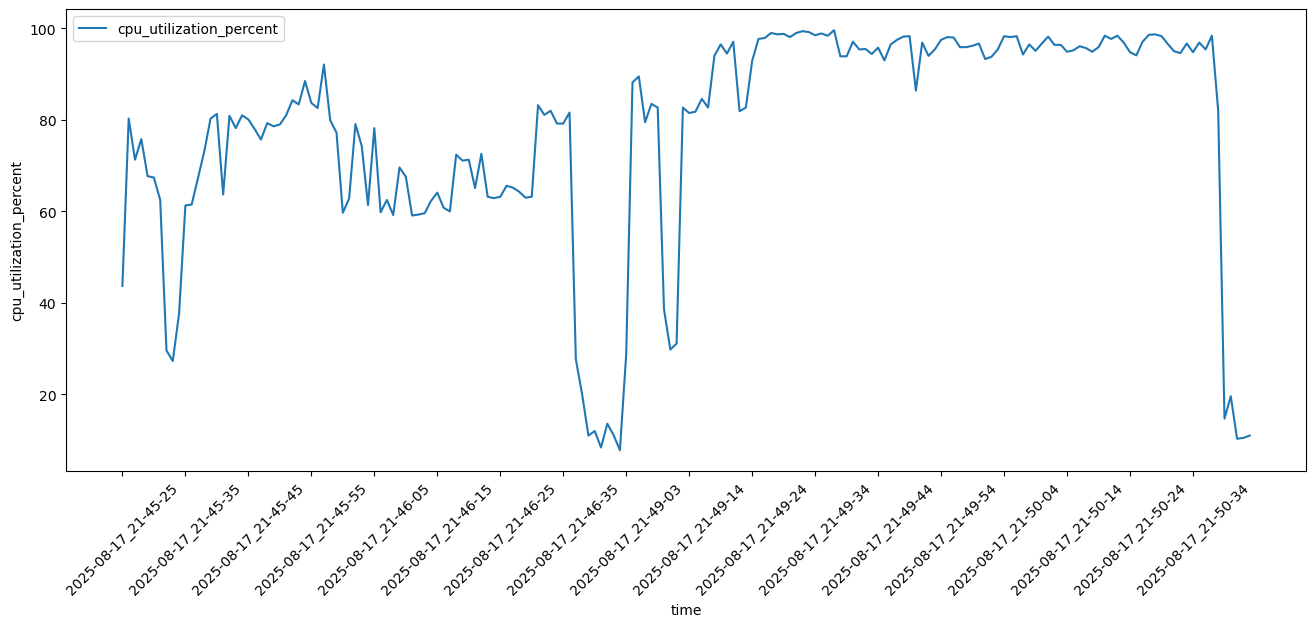

In [41]:
df_4_6_threads = pd.concat([df_4_threads, df_6_threads], ignore_index=True)
plot_time_series(df_4_6_threads,'time','cpu_utilization_percent')

In [23]:
# ---------- 1) Z-score outlier removal ----------
def remove_outliers_zscore(df: pd.DataFrame, col: str, threshold: float = 3.0) -> pd.DataFrame:
    s = df[col]
    mu, sigma = s.mean(skipna=True), s.std(skipna=True, ddof=0)
    if sigma == 0 or np.isnan(sigma):
        return df.copy()
    z = (s - mu) / sigma
    mask = s.isna() | (z.abs() <= threshold)
    return df.loc[mask].copy()

In [24]:
# ---------- 2) IQR outlier removal ----------
def remove_outliers_iqr(df: pd.DataFrame, col: str, k: float = 1.5) -> pd.DataFrame:
    s = df[col]
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    if iqr == 0 or np.isnan(iqr):
        return df.copy()
    lower, upper = q1 - k * iqr, q3 + k * iqr
    mask = s.isna() | s.between(lower, upper)
    return df.loc[mask].copy()


In [ ]:
# ---------- 3) Linear-regression-based outlier removal ----------
def remove_outliers_linear_regression(df, value_col, time_col=None, z_thresh=3.0):
    time = df[time_col]

    time = pd.Series(time).rank(method="first").to_numpy().reshape(-1, 1)
    values = df[value_col]

    # Only use rows without NaN for fitting
    mask = ~values.isna()
    if mask.sum() < 2:
        return df.copy()

    # Fit regression
    model = LinearRegression().fit(time[mask], values[mask])
    preds = model.predict(time[mask])

    # Compute residual z-scoresa
    residuals = values[mask] - preds
    z = (residuals - residuals.mean()) / residuals.std(ddof=0)

    # Keep: rows with small residuals OR rows we didn’t fit (NaNs)
    keep_idx = df.index[mask][np.abs(z) <= z_thresh].tolist()
    keep_idx += df.index[~mask].tolist()

    return df.loc[keep_idx].copy()

In [56]:
# ---------- Missing data filling ----------
def fill_forward(df: pd.DataFrame, col: str, limit: int = None) -> pd.DataFrame:
    out = df.copy()
    out[col] = out[col].ffill(limit=limit)
    return out


def fill_backward(df: pd.DataFrame, col: str, limit: int = None) -> pd.DataFrame:
    out = df.copy()
    out[col] = out[col].bfill(limit=limit)
    return out

def fill_with_window_mean(df: pd.DataFrame, col: str, window: int = 3, min_periods: int = 1, center: bool = False) -> pd.DataFrame:
    s = df[col]
    roll = s.rolling(window=window, min_periods=min_periods, center=center).mean()
    out = df.copy()
    out[col] = s.where(~s.isna(), roll)
    return out

def fill_linear_interpolation(df: pd.DataFrame, col: str, limit_direction: str = "both", limit: int = None) -> pd.DataFrame:
    out = df.copy()
    out[col] = df[col].interpolate(method="linear", limit_direction=limit_direction, limit=limit)
    return out

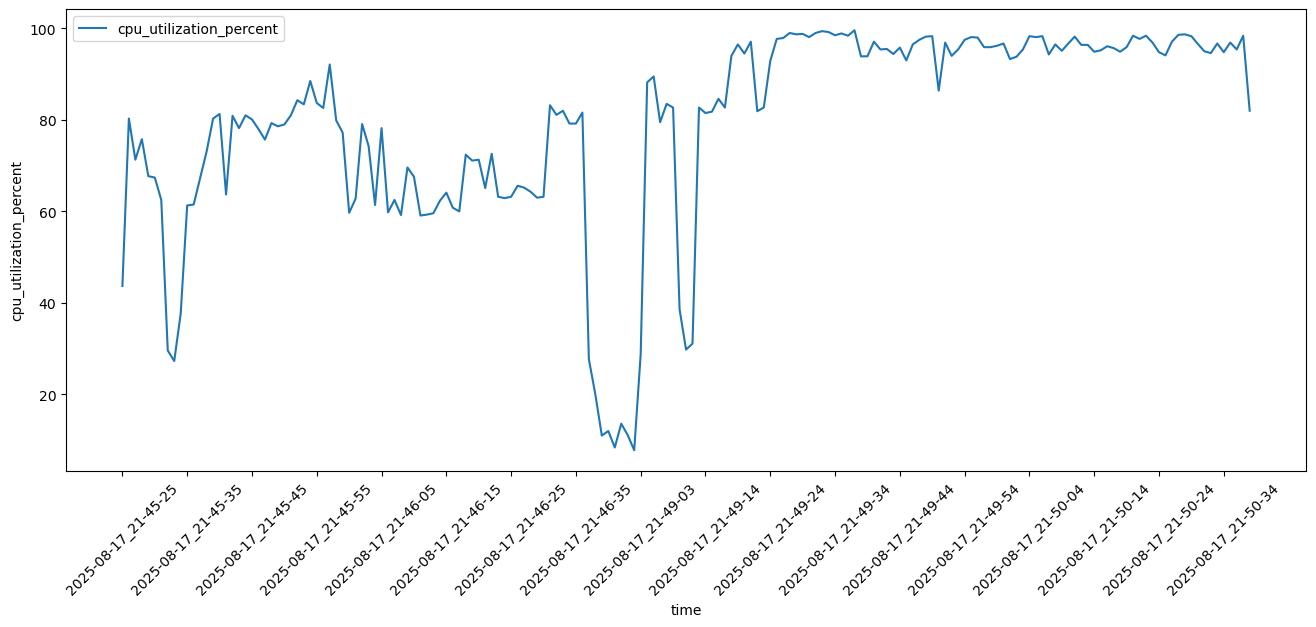

In [44]:
no_outlier_46_threads= remove_outliers_linear_regression(df=df_4_6_threads,value_col='cpu_utilization_percent', time_col='time')
plot_time_series(no_outlier_46_threads,'time','cpu_utilization_percent')

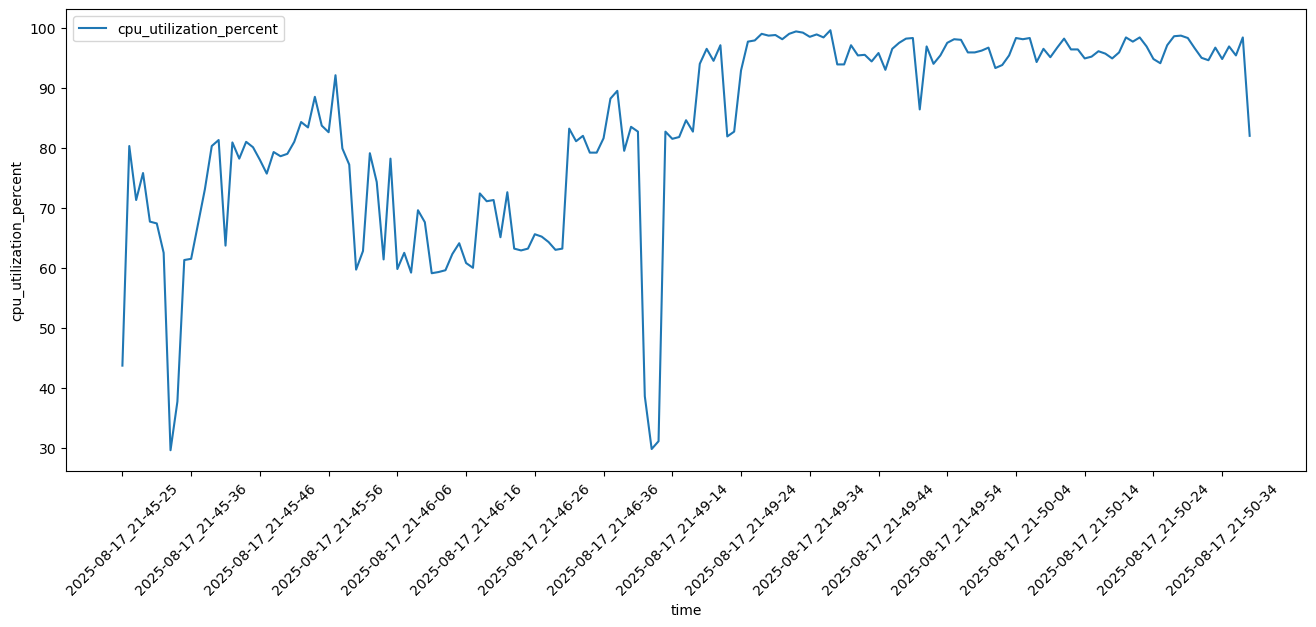

In [50]:
no_outlier_46_threads_zscore = remove_outliers_zscore(df=df_4_6_threads,col= 'cpu_utilization_percent',threshold=2)
plot_time_series(no_outlier_46_threads_zscore,'time', 'cpu_utilization_percent')

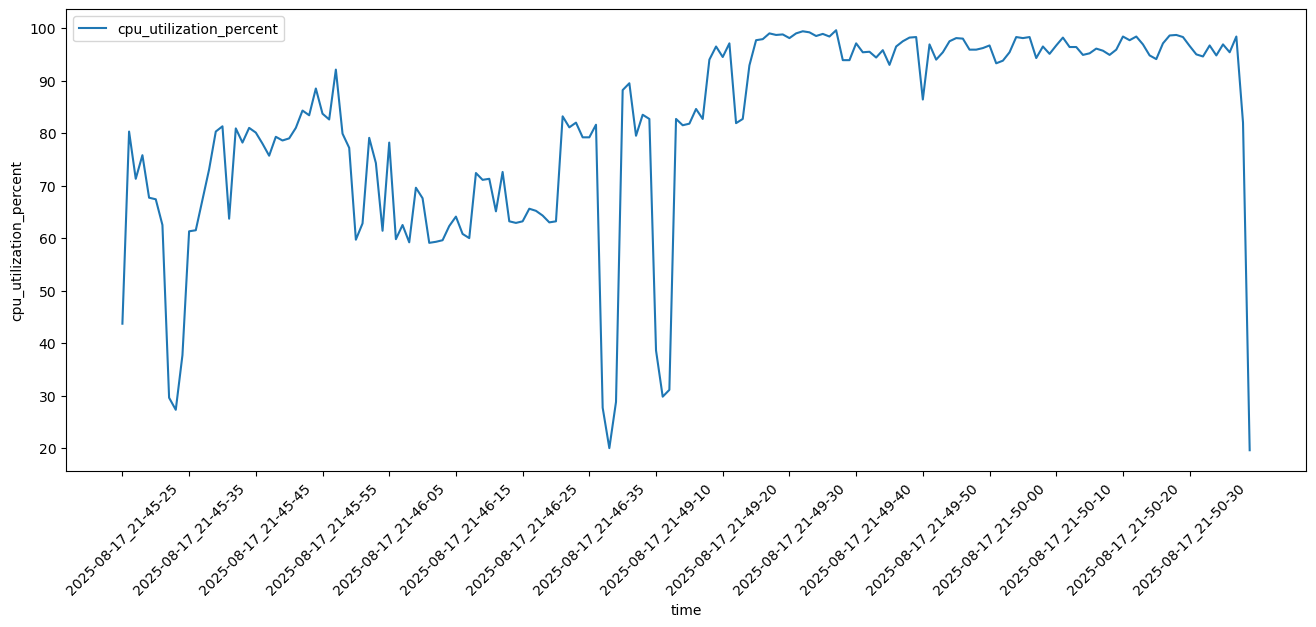

In [52]:
no_outlier_46_threads_iqr = remove_outliers_iqr(df=df_4_6_threads,col= 'cpu_utilization_percent')
plot_time_series(no_outlier_46_threads_iqr,'time', 'cpu_utilization_percent')

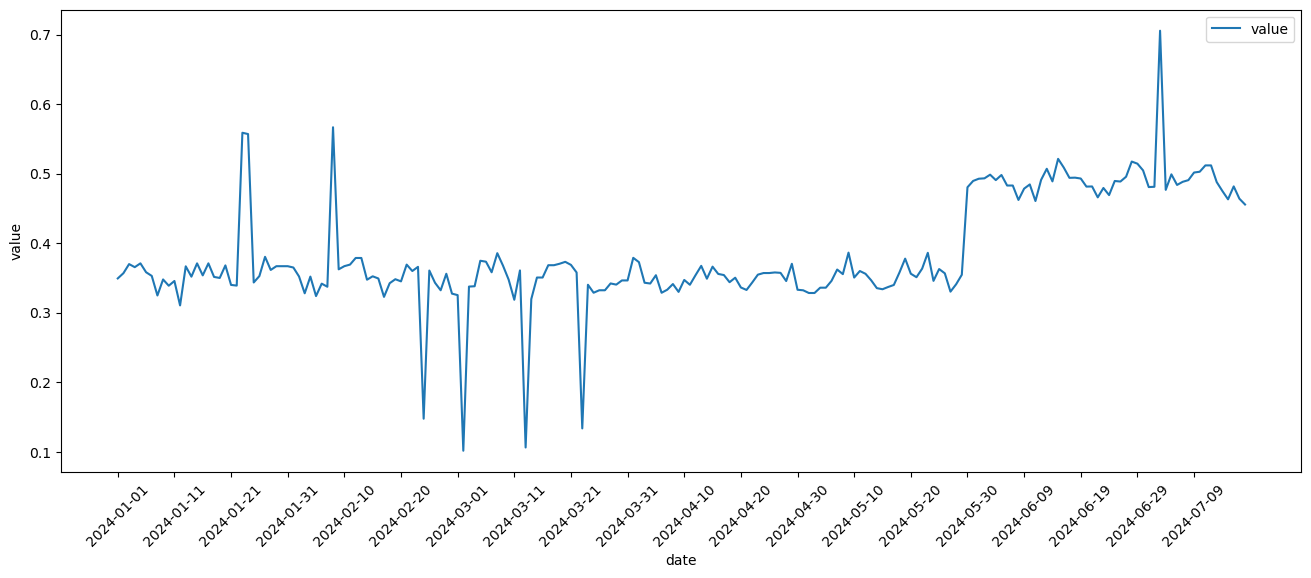

In [54]:
df6_fill_forward= fill_forward(df6, 'value')
plot_time_series(df6_fill_forward,'date','value')

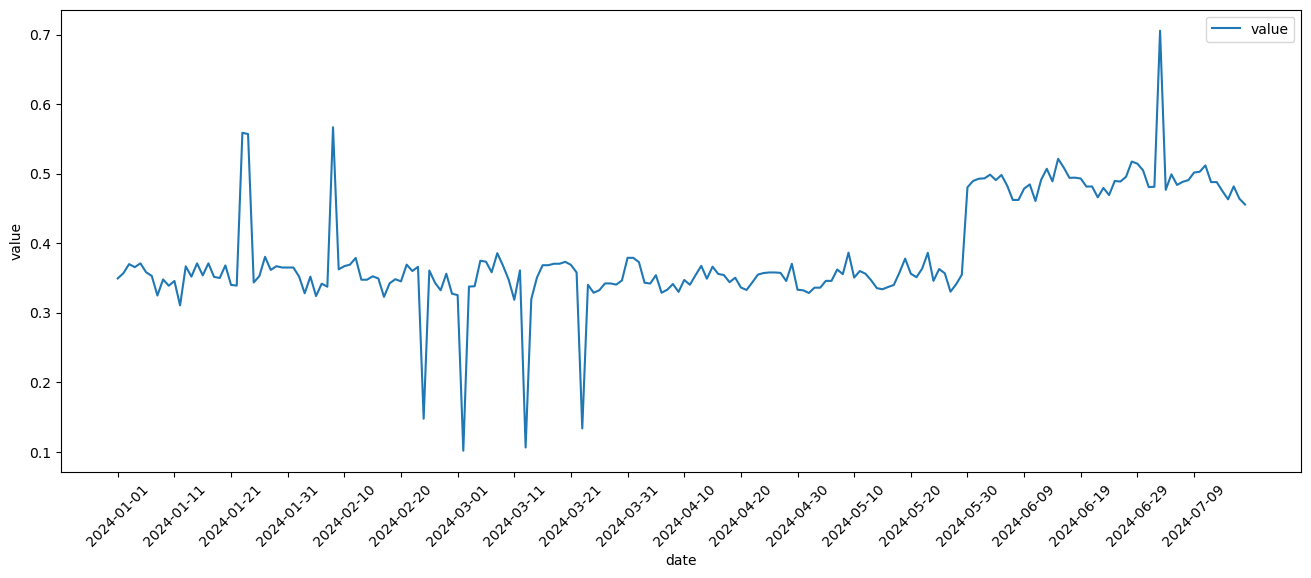

In [57]:
df6_fill_backward= fill_backward(df6, 'value')
plot_time_series(df6_fill_backward,'date','value')

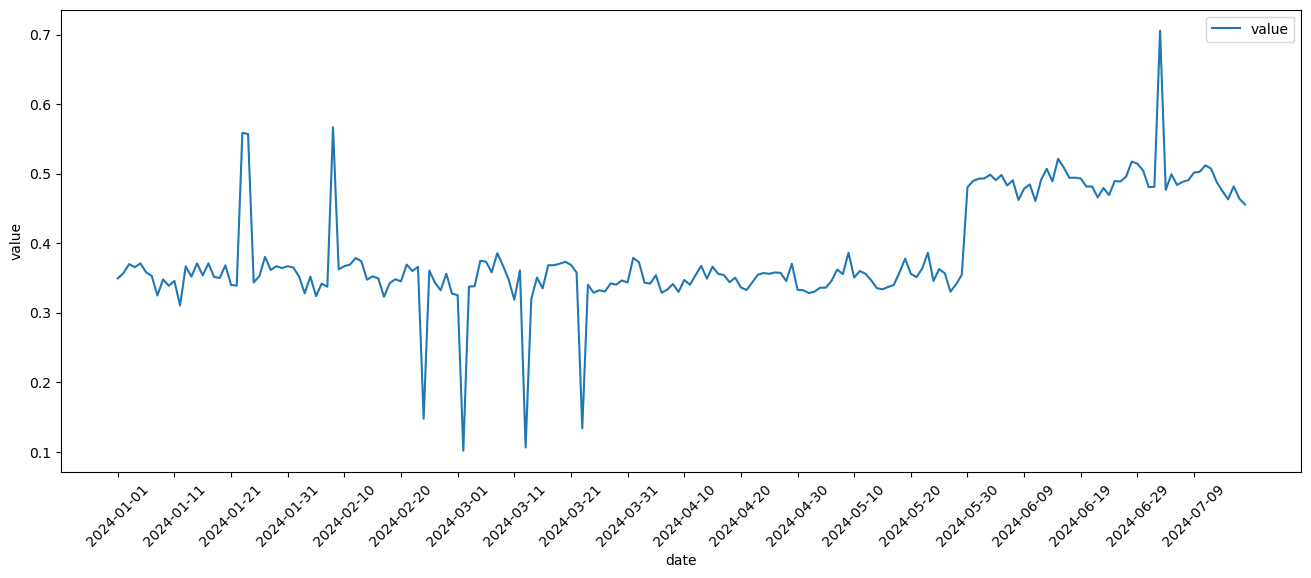

In [55]:
df6_window_mean= fill_with_window_mean(df6, 'value')
plot_time_series(df6_window_mean,'date','value')